# LIBRARIES

In [46]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Part 1: Data Exploration and Preparation

In [16]:
# Load the data

btc = pd.read_csv(r"BTC-Daily.csv")

In [17]:
# Display the first few rows of the dataset

btc.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [18]:
# Describe the dataset

btc.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


In [19]:
# Convert the 'date' column to datetime format

btc['date'] = pd.to_datetime(btc['date'])
btc

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


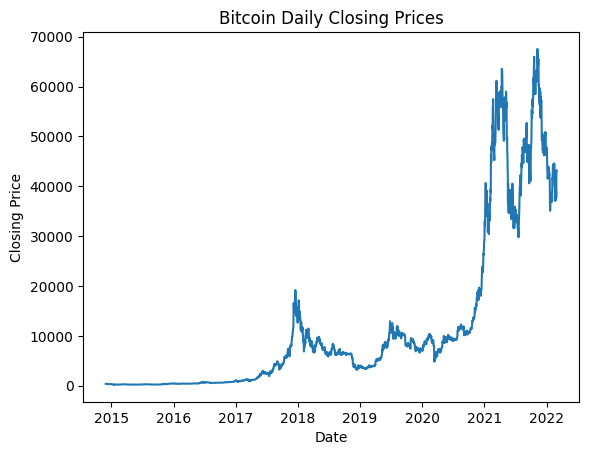

In [20]:
# Visualize the daily closing prices using line plots.

plt.plot(btc['date'], btc['close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Bitcoin Daily Closing Prices')
plt.show()

In [21]:
#### Preprocessing:

# Check for missing values

print(btc.isnull().sum())

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64


# Part 2: Building Forecasting Models

# Linear Regression

In [22]:
# Convert dates to numerical features 

btc['date_numeric'] = btc['date'].apply(lambda x: datetime.timestamp(x))

In [23]:
# Define features and target variable

X = btc[['date_numeric']]
y = btc['close']

In [24]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test_lr = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
# Initialize and fit the linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict on the test set
y_pred_lr = model.predict(X_test)

In [27]:
# Calculate mean squared error
mse = mean_squared_error(y_test_lr, y_pred_lr)
print("Mean Squared Error:", mse)

Mean Squared Error: 103238157.79716276


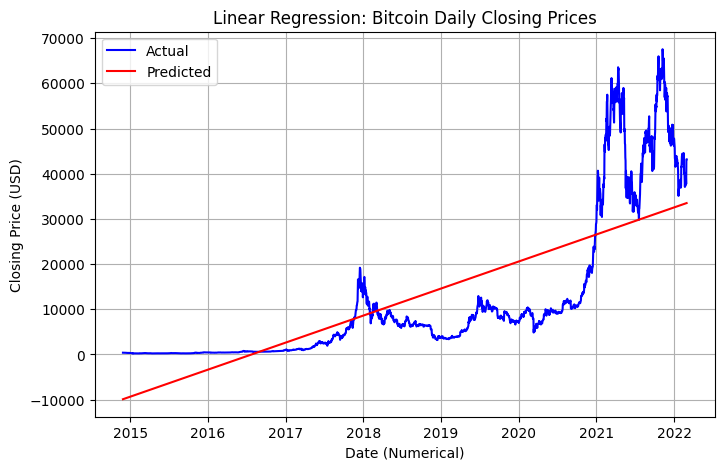

In [28]:
plt.figure(figsize=(8, 5))

# Plot actual closing prices

plt.plot(btc['date'], btc['close'], label = 'Actual', color = 'blue')

# Plot predicted closing prices

plt.plot(btc['date'], model.predict(btc[['date_numeric']]), label = 'Predicted', color = 'red')

plt.xlabel('Date (Numerical)')
plt.ylabel('Closing Price (USD)')
plt.title('Linear Regression: Bitcoin Daily Closing Prices')
plt.legend()
plt.grid(True)
plt.show()

* Discuss the appropriateness of a linear model for this kind of data.

A linear model may not be suitable for predicting Bitcoin prices due to the cryptocurrency market's highly nonlinear and         volatile nature. Linear regression assumes a linear relationship between variables, which may not capture the complex           patterns and trends inherent in Bitcoin price data. Additionally, linear regression does not account for time series             characteristics like trends, seasonality, and autocorrelation, which are crucial in modeling Bitcoin prices. Cryptocurrency markets are also prone to outliers and extreme events, which linear regression may not handle well.

# Non-Linear Regression

* Explore a non-linear model and justify the choice of the specific model.


The RandomForestRegressor is selected to forecast Bitcoin prices because of its flexibility in capturing complex non-linear relationships, adaptability to complex data patterns, and utilization of ensemble learning for enhanced prediction accuracy. Furthermore, it offers valuable insights into feature importance, facilitating a deeper understanding of the driving forces behind Bitcoin price movements.

In [29]:
# Define the polynomial degree

degree = 3  

# Create polynomial features

poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [30]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test_rf = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
# Initialize Random Forest regressor

rf_regressor = RandomForestRegressor()

# Fit the model
rf_regressor.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test_poly)

In [32]:
# Calculate mean squared error
mse = mean_squared_error(y_test_rf, y_pred_rf)
print("Mean Squared Error:", mse)

Mean Squared Error: 311260.0843213216


In [33]:
# Sort the test set by date for plotting

X_test_sort, y_test_sort = zip(*sorted(zip(X_test.values.flatten(), y_test_rf)))

# Sort the predictions by date for plotting

y_pred_sort = rf_regressor.predict(X_test_poly)
y_pred_sort, _ = zip(*sorted(zip(y_pred_sort, X_test.values.flatten())))

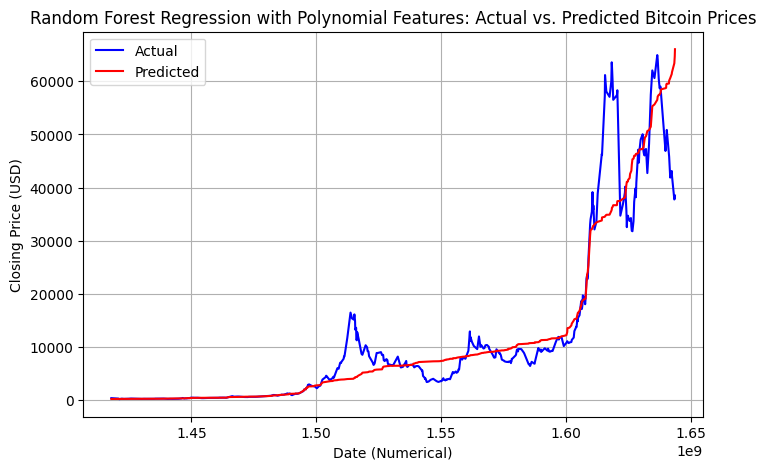

In [34]:
# Plot the actual and predicted prices

plt.figure(figsize=(8, 5))
plt.plot(X_test_sort, y_test_sort, label = 'Actual', color = 'blue')
plt.plot(X_test_sort, y_pred_sort, label = 'Predicted', color = 'red')
plt.xlabel('Date (Numerical)')
plt.ylabel('Closing Price (USD)')
plt.title('Random Forest Regression with Polynomial Features: Actual vs. Predicted Bitcoin Prices')
plt.legend()
plt.grid(True)
plt.show()

# ARIMA MODEL

# 1. Test for Stationarity and Perform Differencing

In [35]:
# Set 'date' as index and select 'close' column

# Set the index and sort it

btc.set_index('date', inplace = True)
btc.sort_index(inplace = True)

btc_close = btc['close']

In [36]:
# Step 2: Check for stationarity

def test_stationarity(ts):
    
    # Perform Dickey-Fuller test
    
    result = adfuller(ts)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    
    # Check for stationarity based on the p-value

    if result[1] < 0.05:
        print("The time series is stationary (reject the null hypothesis)")
    else:
        print("The time series is non-stationary (fail to reject the null hypothesis)")

In [37]:
# Check for stationarity

test_stationarity(btc_close)

ADF Statistic: -0.9875841417510538
p-value: 0.7577657213555867
The time series is non-stationary (fail to reject the null hypothesis)


In [38]:
# Data is not stationary, perform differencing

btc_close_diff = btc_close.diff().dropna()
test_stationarity(btc_close_diff)

ADF Statistic: -8.47850283038204
p-value: 1.4139138299595207e-13
The time series is stationary (reject the null hypothesis)


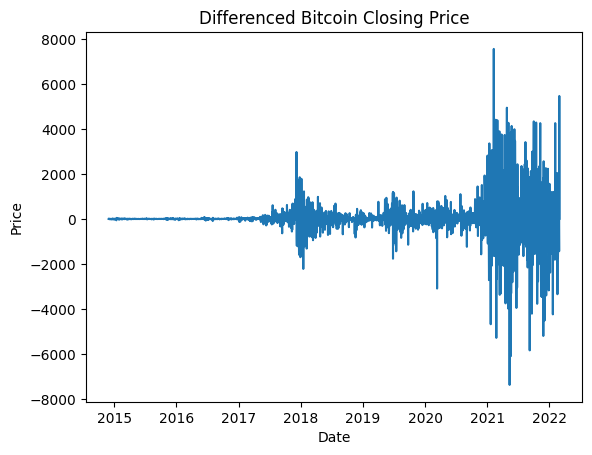

In [39]:
# Plotting the differenced data

plt.plot(btc_close_diff)
plt.title('Differenced Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# 2. Determine the Order of the ARIMA Model

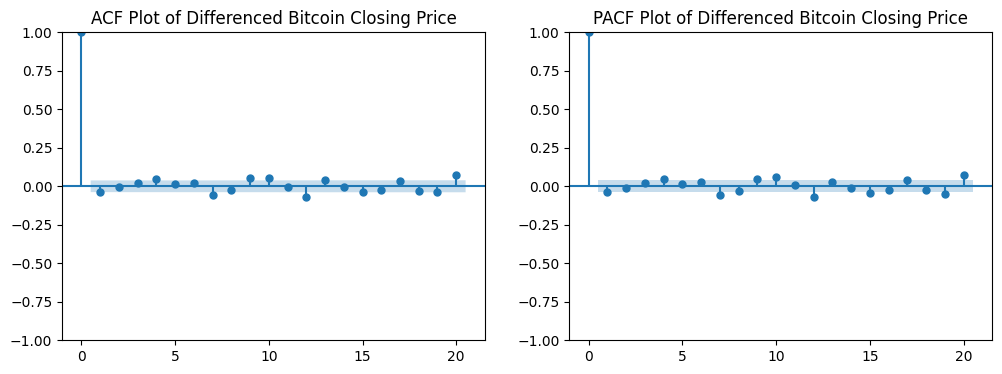

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(btc_close_diff, lags = 20, ax=ax1)
ax1.set_title('ACF Plot of Differenced Bitcoin Closing Price')

# PACF plot
plot_pacf(btc_close_diff, lags = 20, ax=ax2)
ax2.set_title('PACF Plot of Differenced Bitcoin Closing Price')

plt.show()

# 3. Fit the ARIMA Model 

In [41]:
# Orders based on the plots
p, d, q = 1, 1, 1

# Set the frequency explicitly
btc_close.index.freq = 'D'  

# Split the data into training and testing sets

btc_close_train, btc_close_test = train_test_split(btc_close_diff, test_size = 0.2, shuffle = False)

# Perform ARIMA modeling on the training set

arima_model = ARIMA(btc_close_train, order = (p, d, q))
results = arima_model.fit()

In [42]:
# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2120
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14990.532
Date:                Wed, 01 May 2024   AIC                          29987.064
Time:                        19:24:33   BIC                          30004.040
Sample:                    11-29-2014   HQIC                         29993.279
                         - 09-17-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0155      0.009     -1.748      0.080      -0.033       0.002
ma.L1         -0.9999      0.013    -79.472      0.000      -1.025      -0.975
sigma2      8.141e+04   1161.677     70.084      0.0

# Part 3: Model Evaluation and Selection

# Performance Metrics: Calculate RMSE , MAE , and MAPE  for each model.

# For Linear Regression:

In [43]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))

# Calculate MAE
mae = mean_absolute_error(y_test_lr, y_pred_lr)

# Calculate MAPE
mape = np.mean(np.abs((y_test_lr - y_pred_lr) / y_test_lr)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 10160.617983034435
MAE: 7857.784115951631
MAPE: 511.48252831791183


# For Non-Linear Regression:

In [44]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))

# Calculate MAE
mae = mean_absolute_error(y_test_rf, y_pred_rf)

# Calculate MAPE
mape = np.mean(np.abs((y_test_rf - y_pred_rf) / y_test_rf)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 557.9068778222057
MAE: 261.061332956686
MAPE: 2.1784866708346633


# For ARIMA Model:

In [45]:
# Make predictions using the fitted ARIMA model

forecast = results.forecast(steps = len(btc_close_test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(btc_close_test, forecast))

# Calculate MAE
mae = mean_absolute_error(btc_close_test, forecast)

# Calculate MAPE
mape = np.mean(np.abs((btc_close_test - forecast) / btc_close_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 1692.5384861575903
MAE: 1181.6103423044678
MAPE: 104.27580093168089


# Cross-Validation: Employ time series cross-validation techniques to evaluate the models' forecasting performance. 

# Residual Analysis: Analyze the residuals from each model to check for any patterns or systematic errors.

Linear Regression - RMSE: 26810.38314781825, MAE: 26737.117158936857, MAPE: 2.9296762214741237


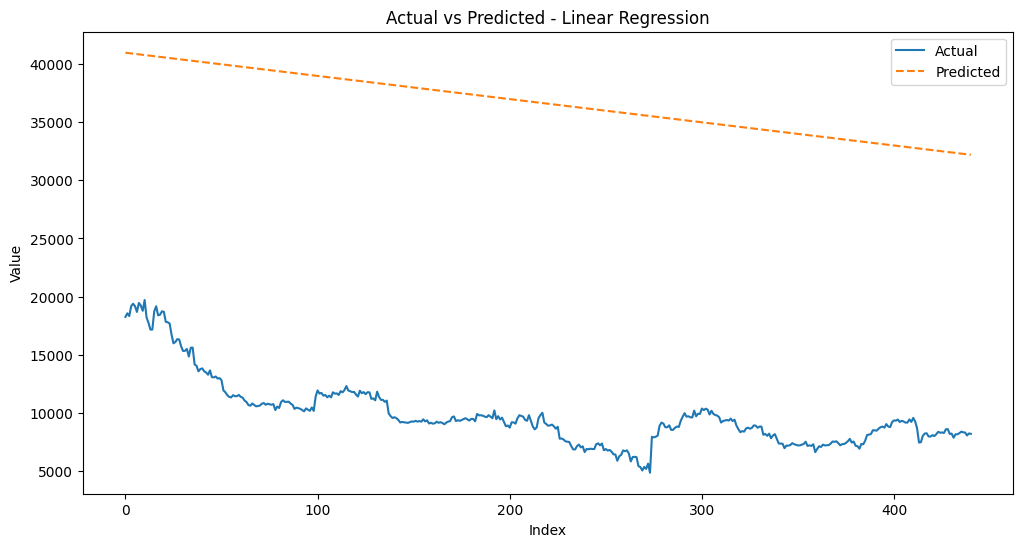

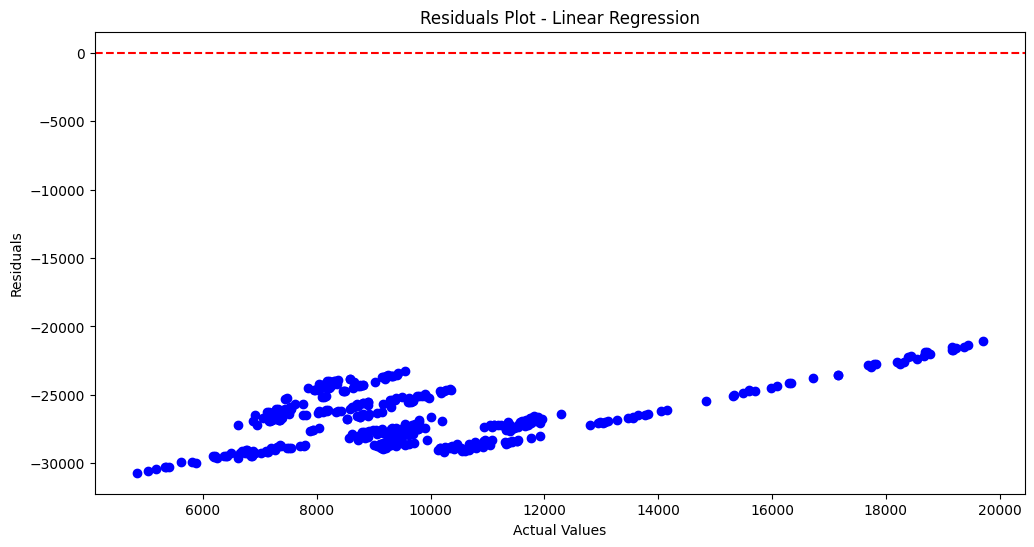

Random Forest Regressor - RMSE: 9040.897065520792, MAE: 8606.79184761905, MAPE: 1.0042690226283835


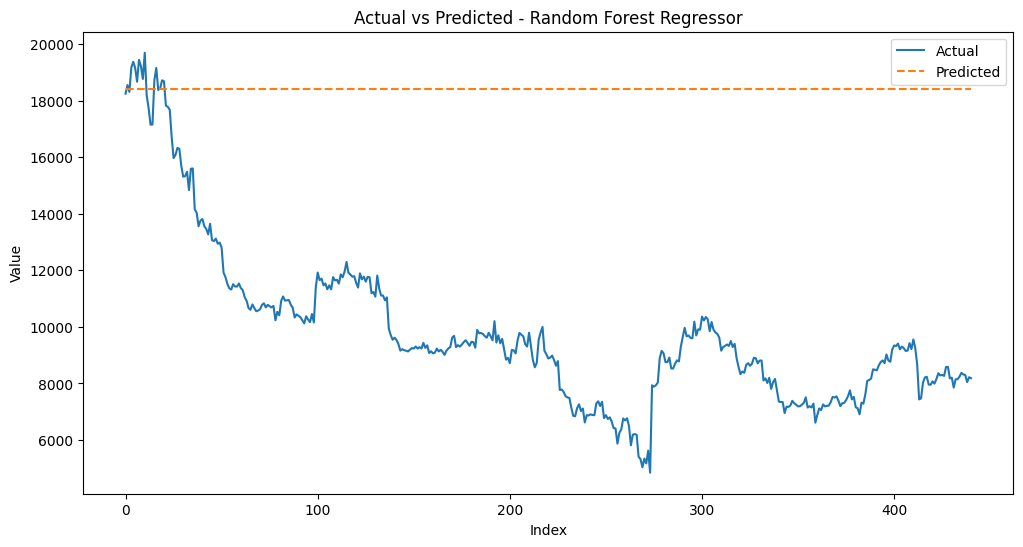

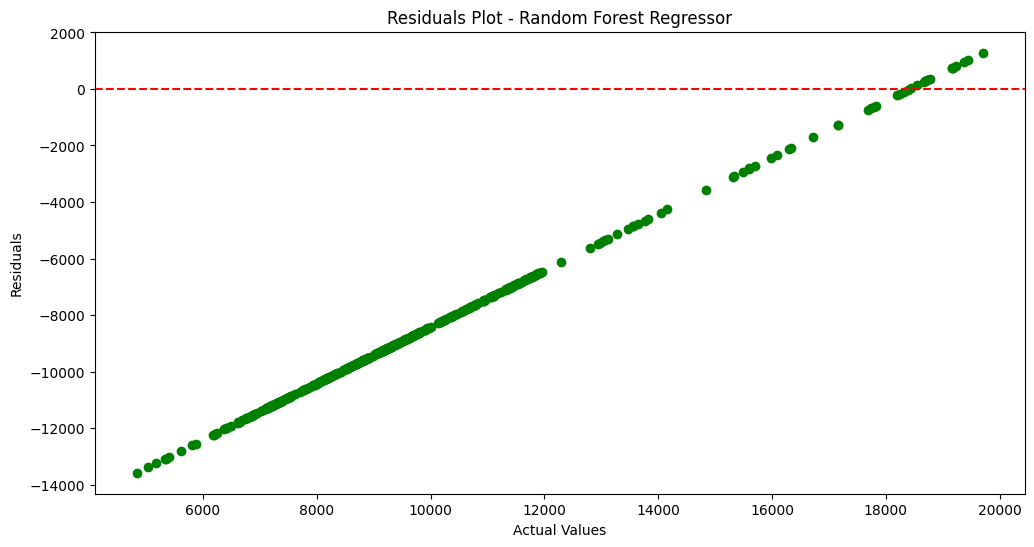

ARIMA - RMSE: 10314.12873221294, MAE: 9904.562793361958, MAPE: 1.0061395626141691


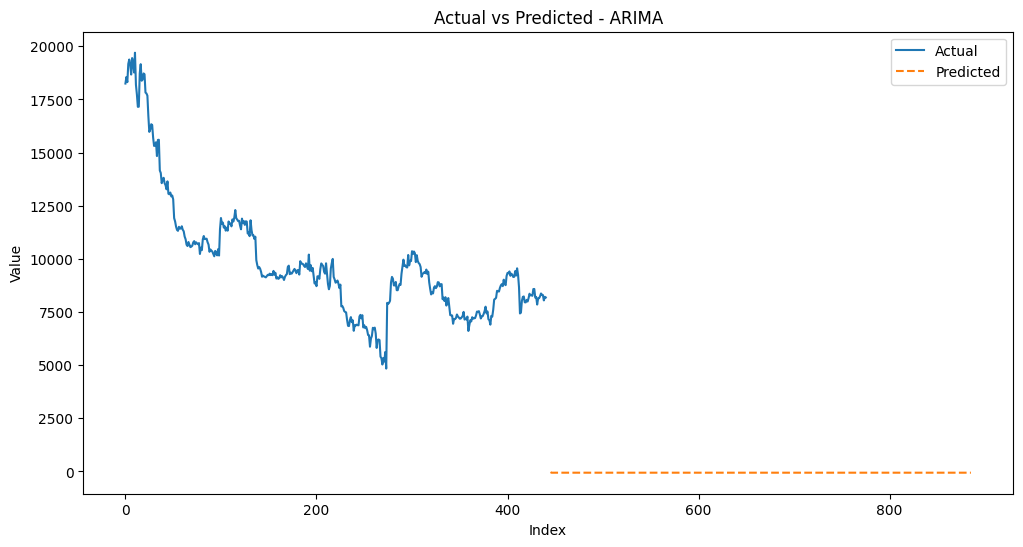

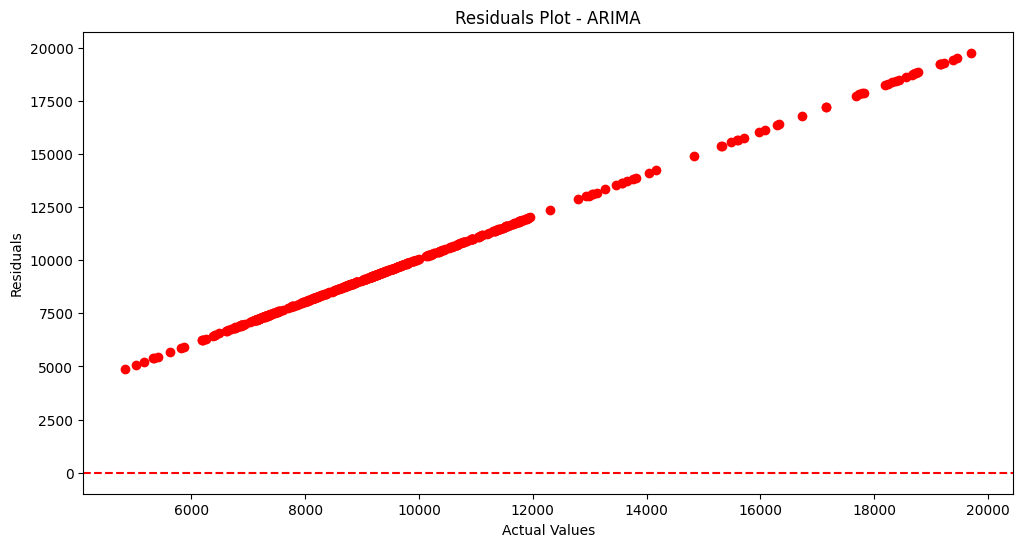

Linear Regression - RMSE: 23093.457222391993, MAE: 21932.80365312962, MAPE: 3.8601815398429524


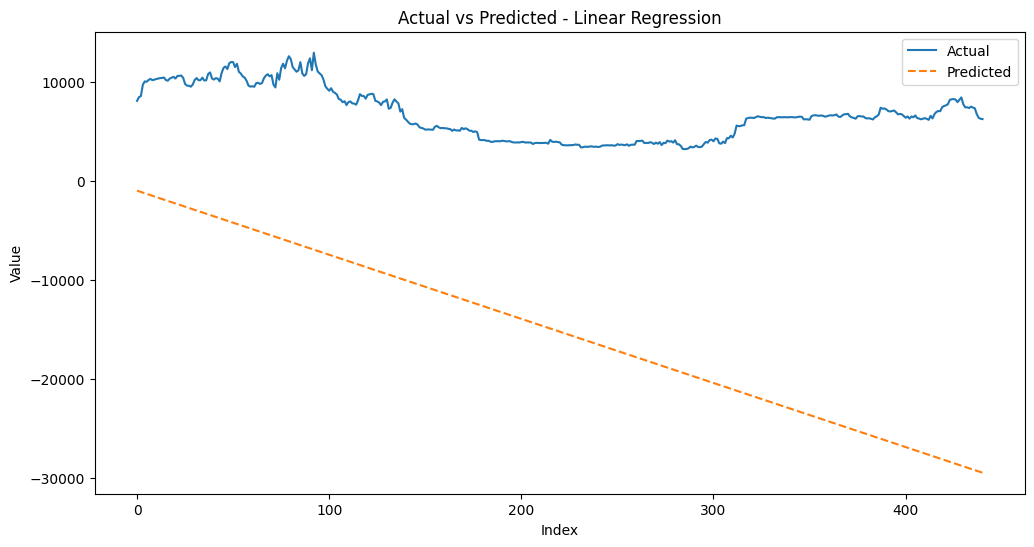

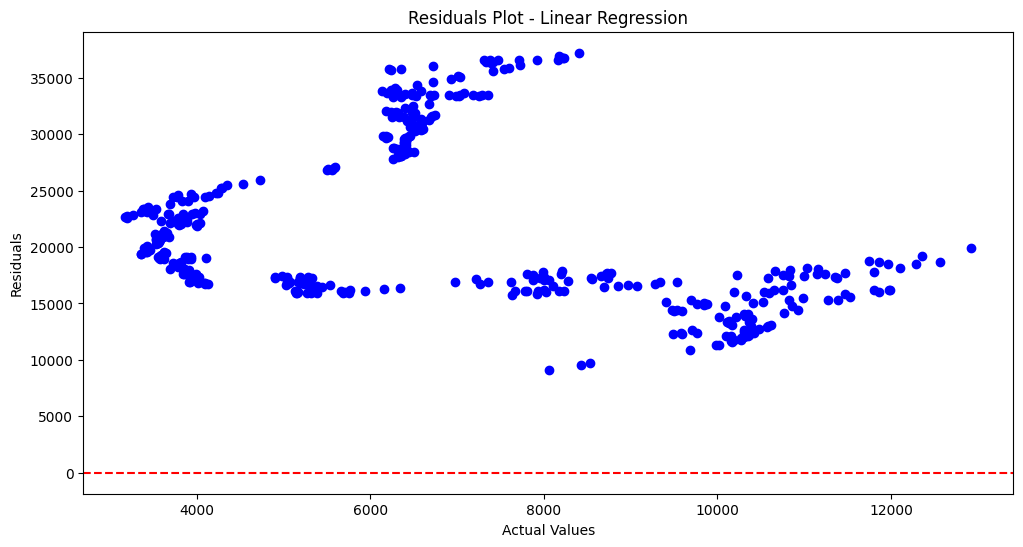

Random Forest Regressor - RMSE: 2986.2402710988545, MAE: 2619.675877551013, MAPE: 0.532249989515866


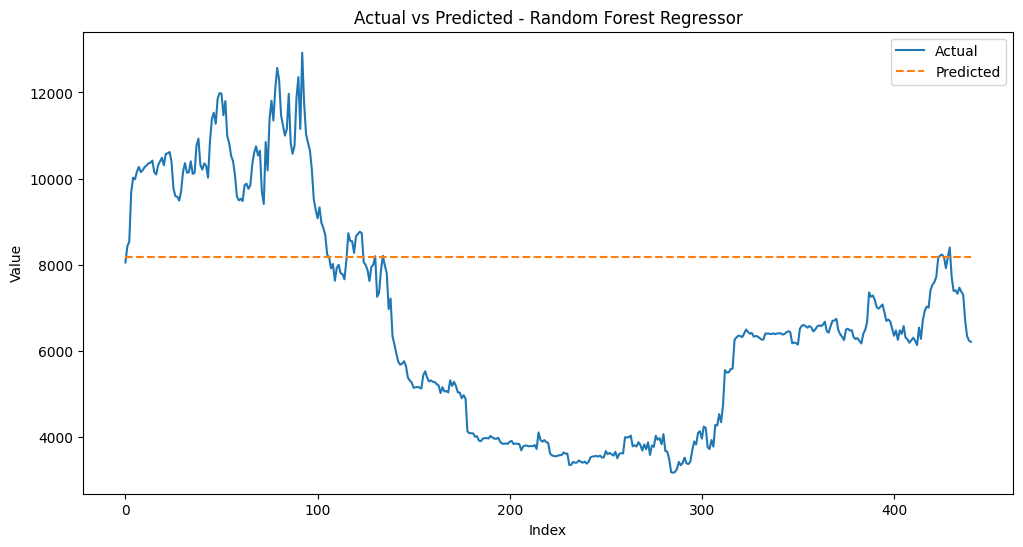

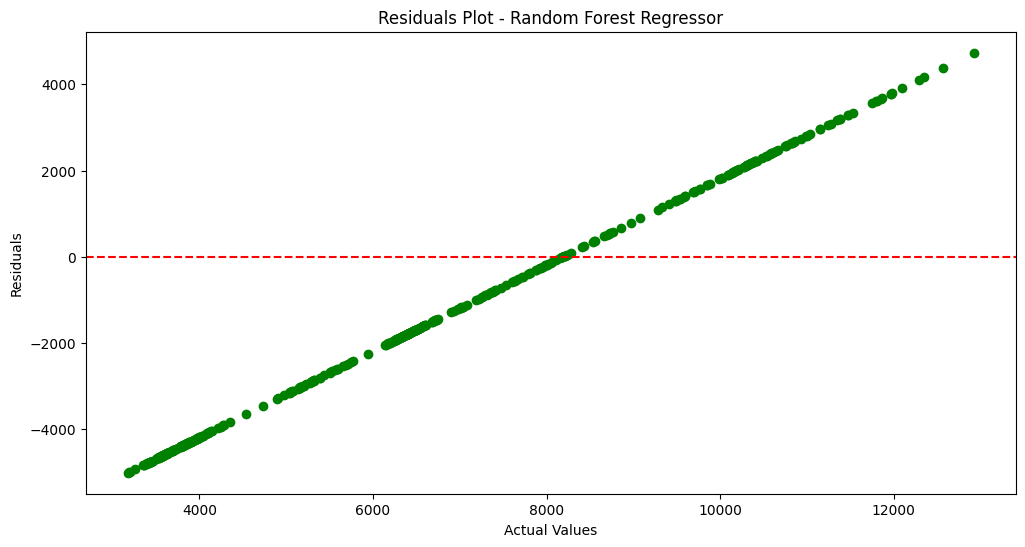

ARIMA - RMSE: 7182.407650300792, MAE: 6706.764355155616, MAPE: 1.0068971175710275


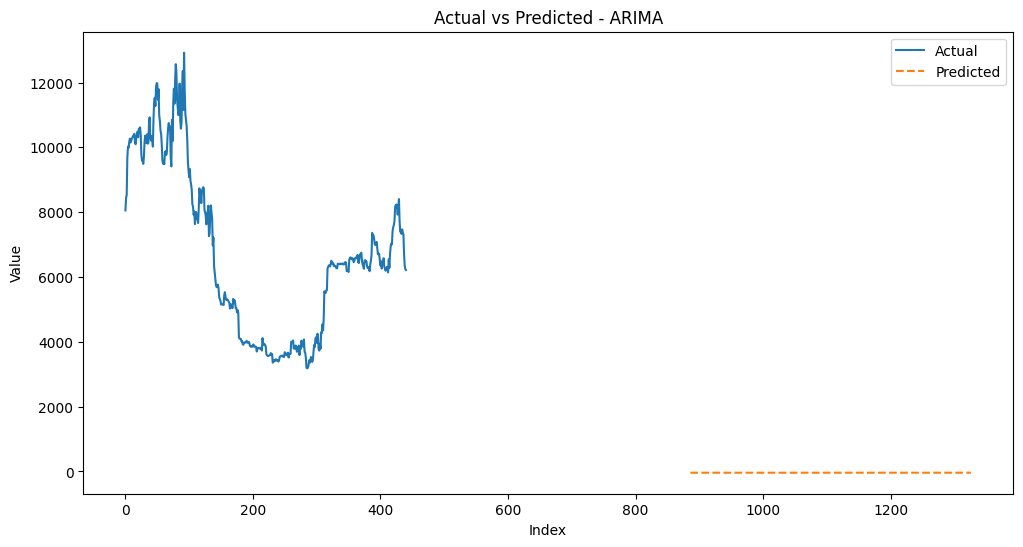

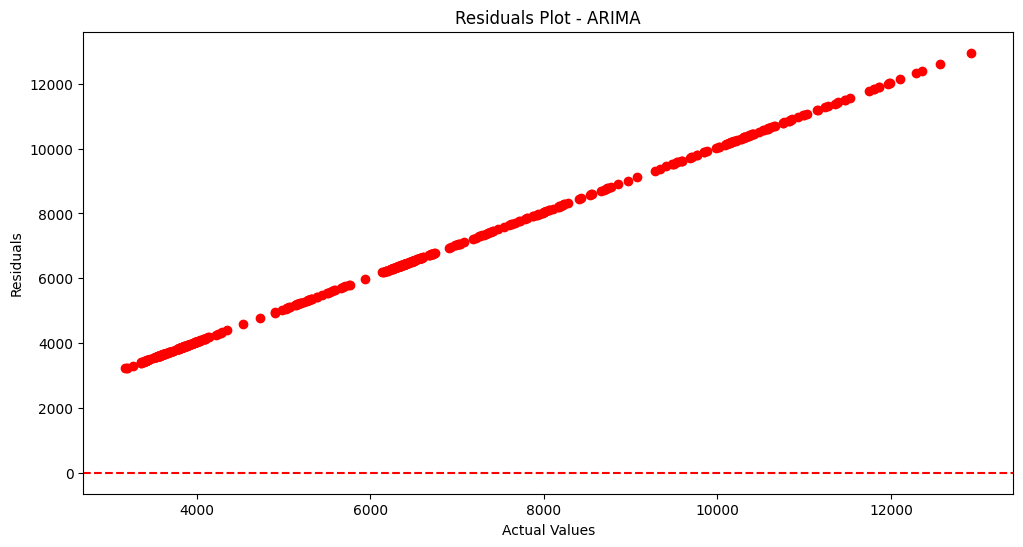

Linear Regression - RMSE: 22679.065666629092, MAE: 22268.454985510463, MAPE: 4.853877985772513


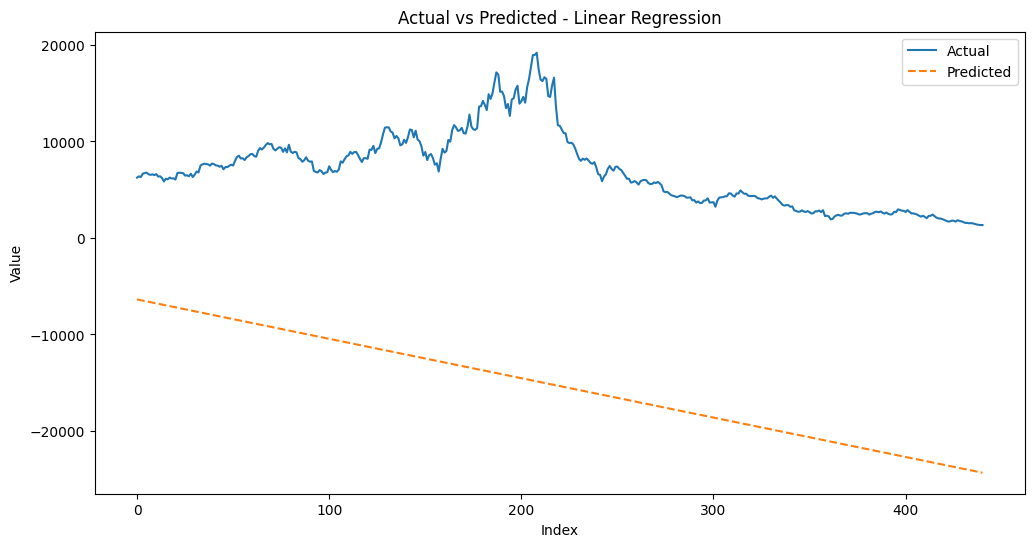

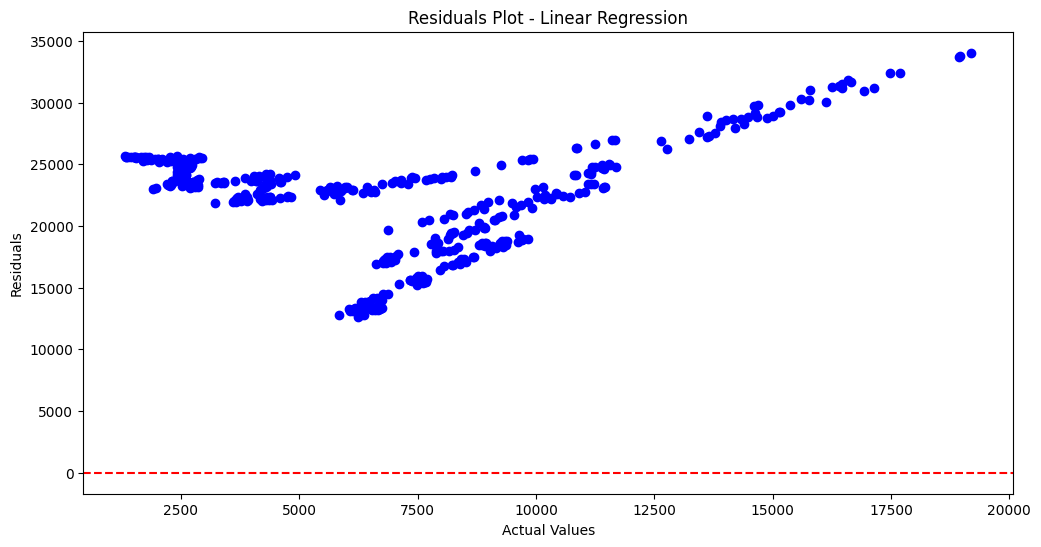

Random Forest Regressor - RMSE: 3961.028057470695, MAE: 3132.8611111111113, MAPE: 0.6605294625204235


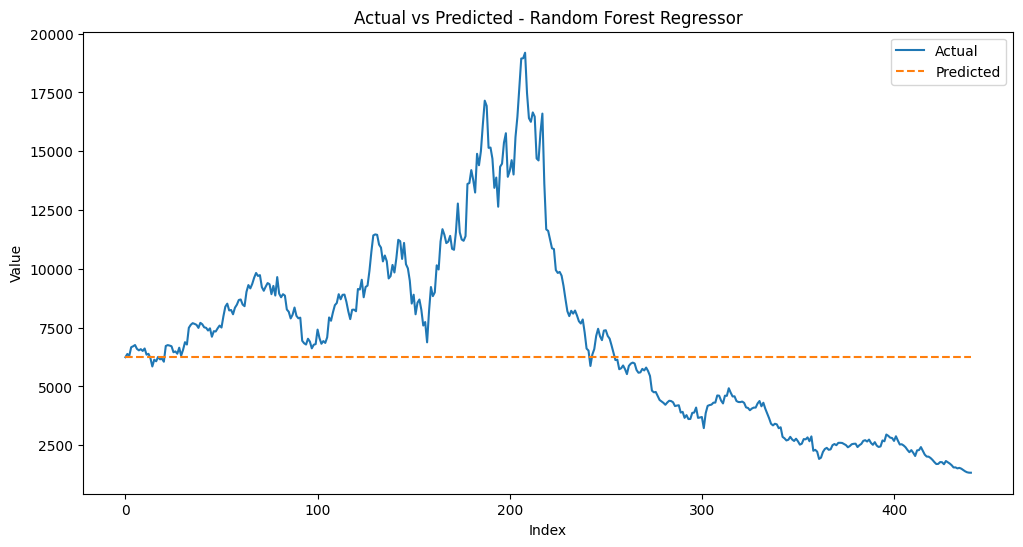

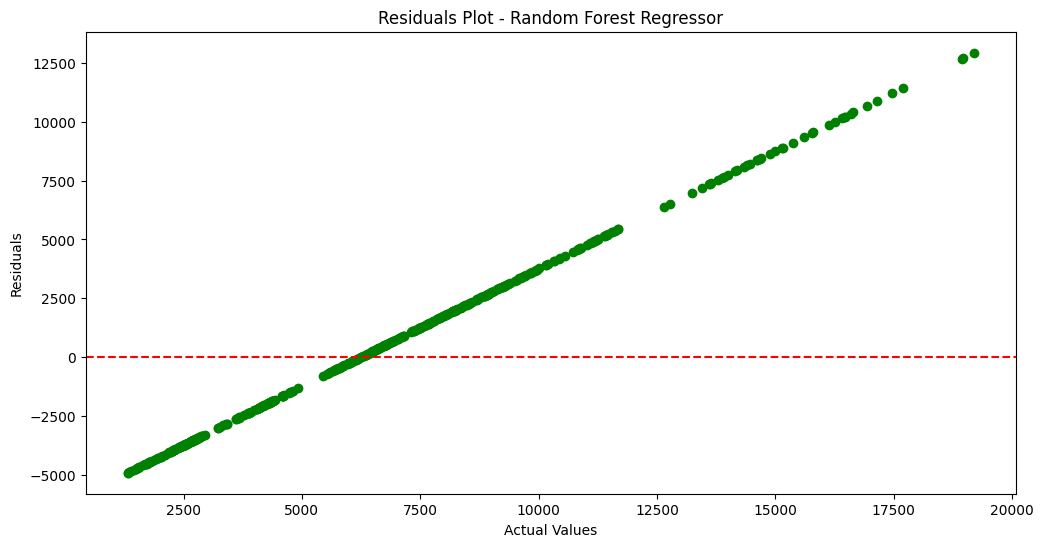

ARIMA - RMSE: 7966.718249677944, MAE: 6944.490652628668, MAPE: 1.0059092723549117


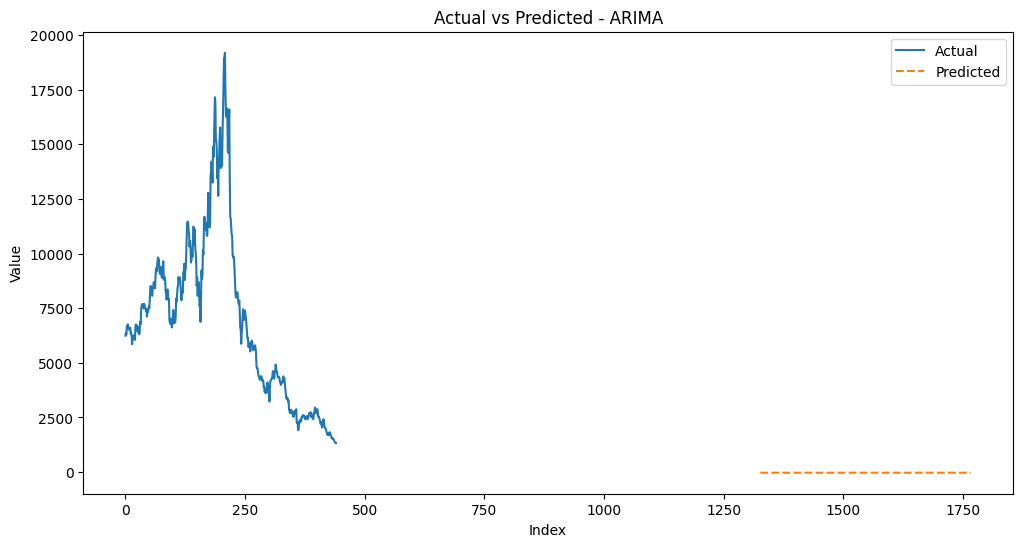

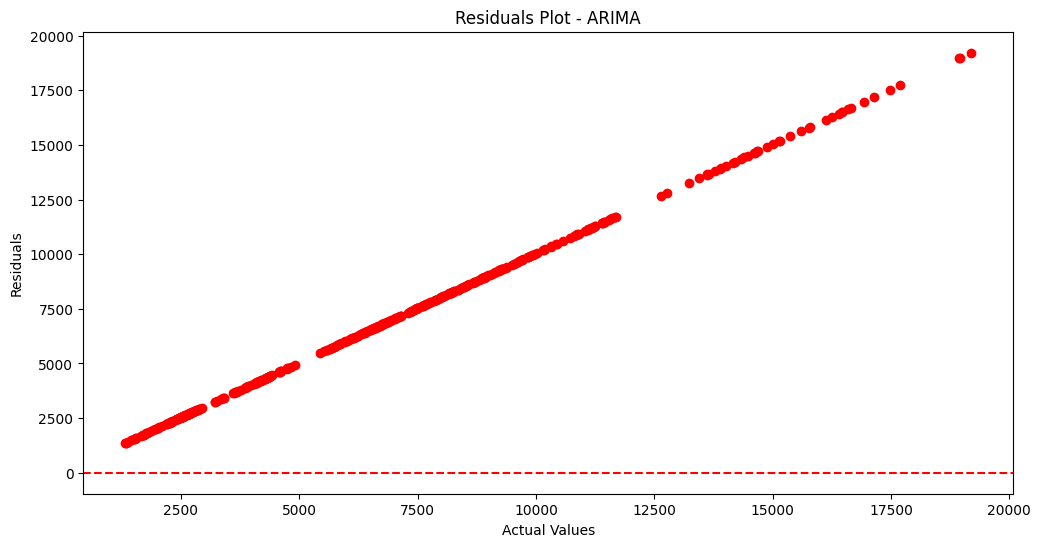

Linear Regression - RMSE: 12886.47840696815, MAE: 12503.371964950706, MAPE: 21.104699255528192


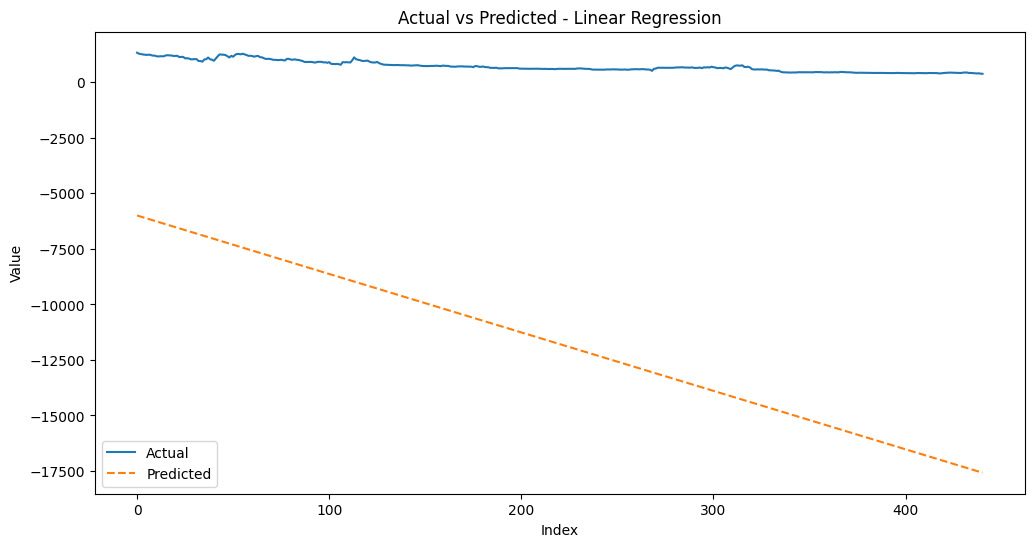

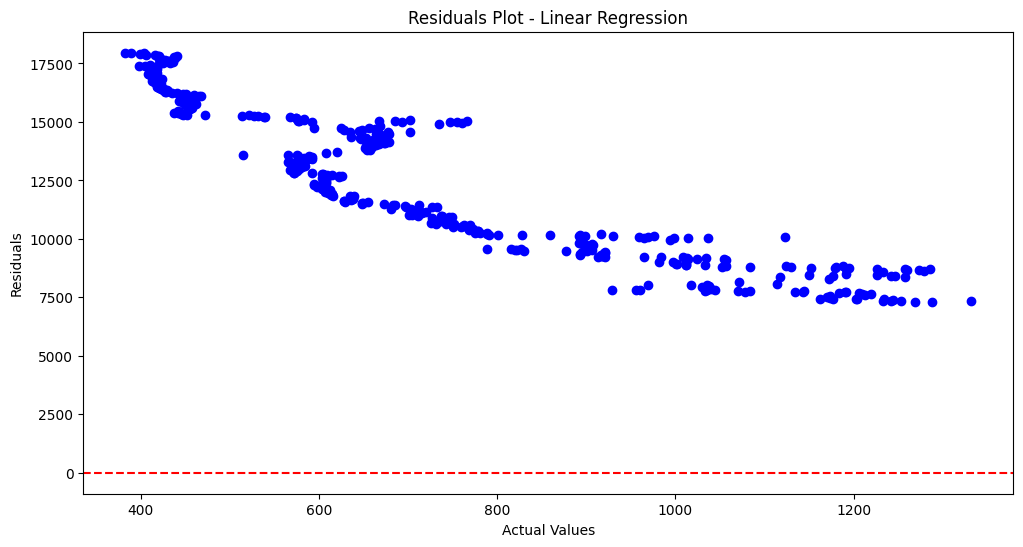

Random Forest Regressor - RMSE: 668.9024493795189, MAE: 619.9310614512463, MAPE: 1.0936101692345996


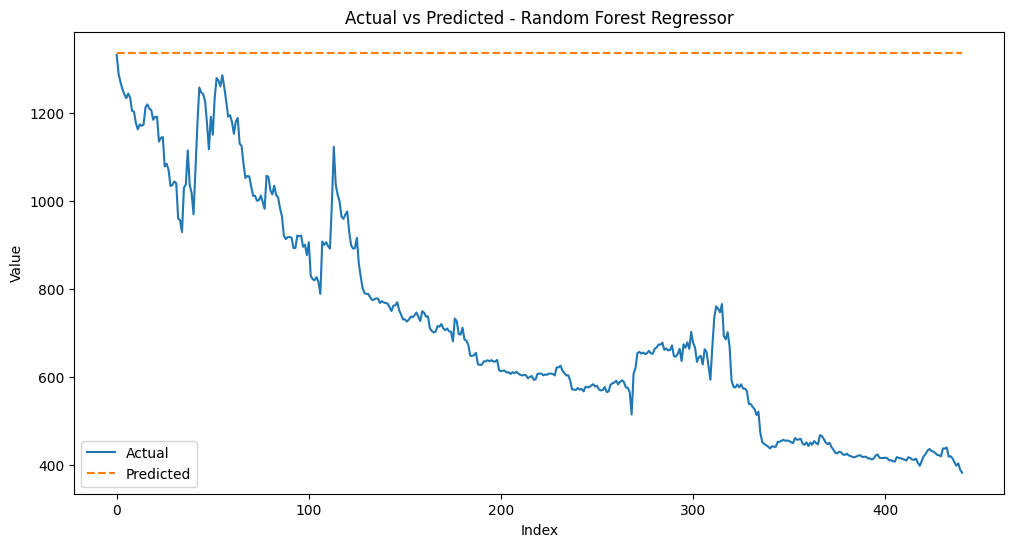

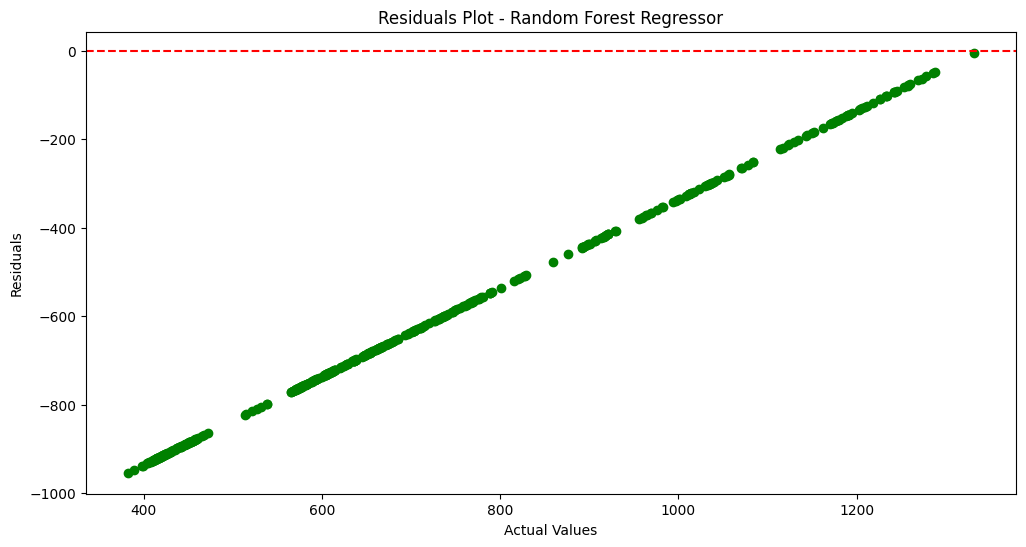

ARIMA - RMSE: 781.4735589609645, MAE: 739.9883446132608, MAPE: 1.037092706524804


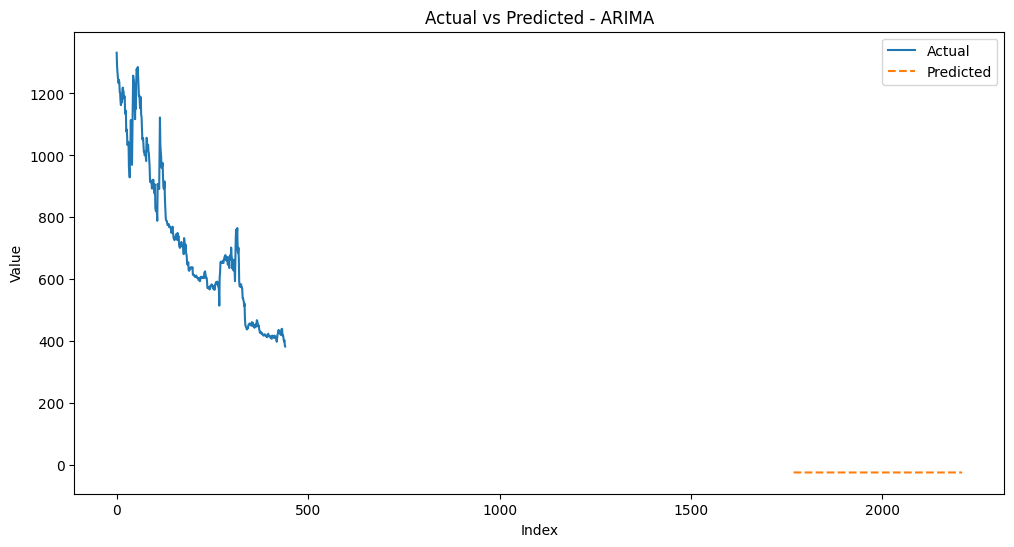

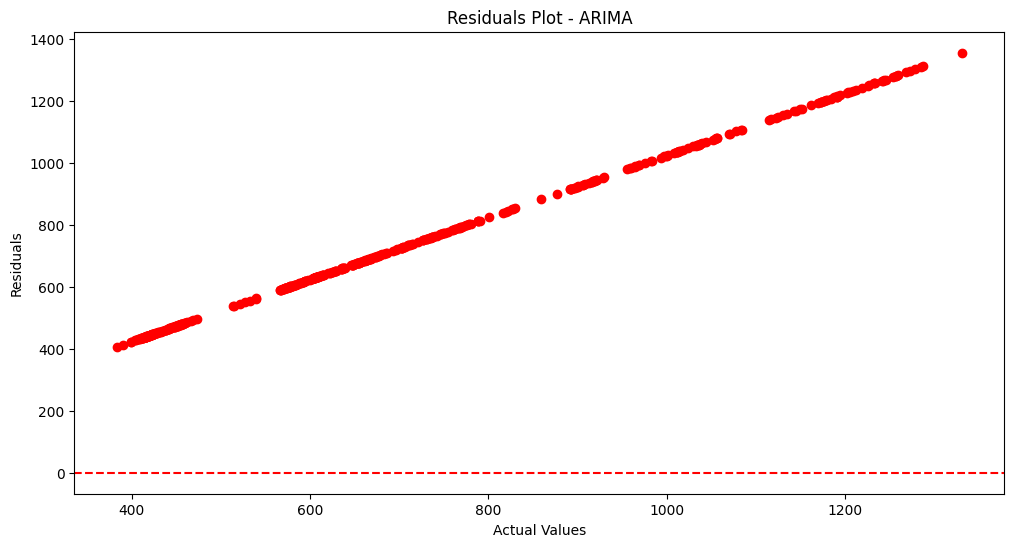

Linear Regression - RMSE: 13988.355646242475, MAE: 13744.36005605208, MAPE: 50.599953779647095


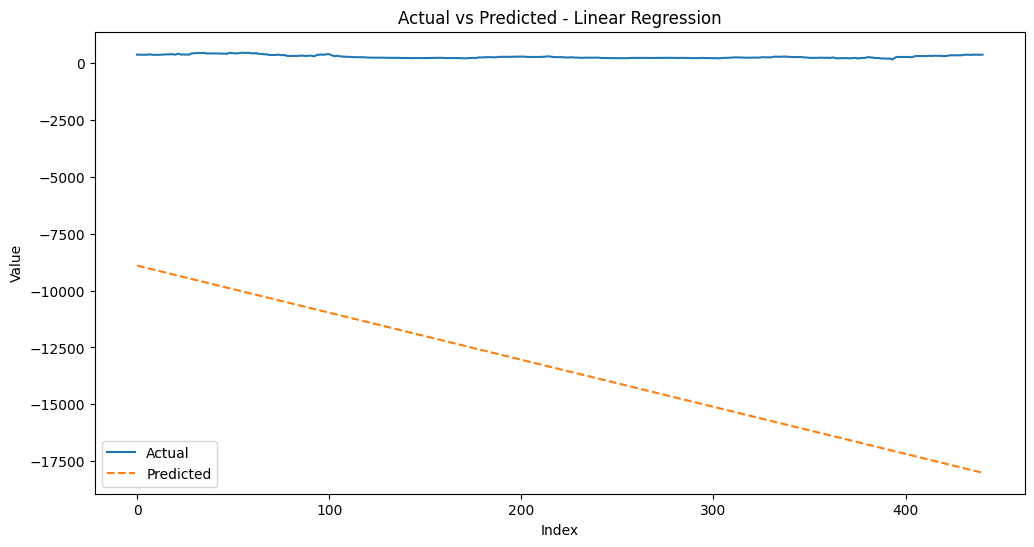

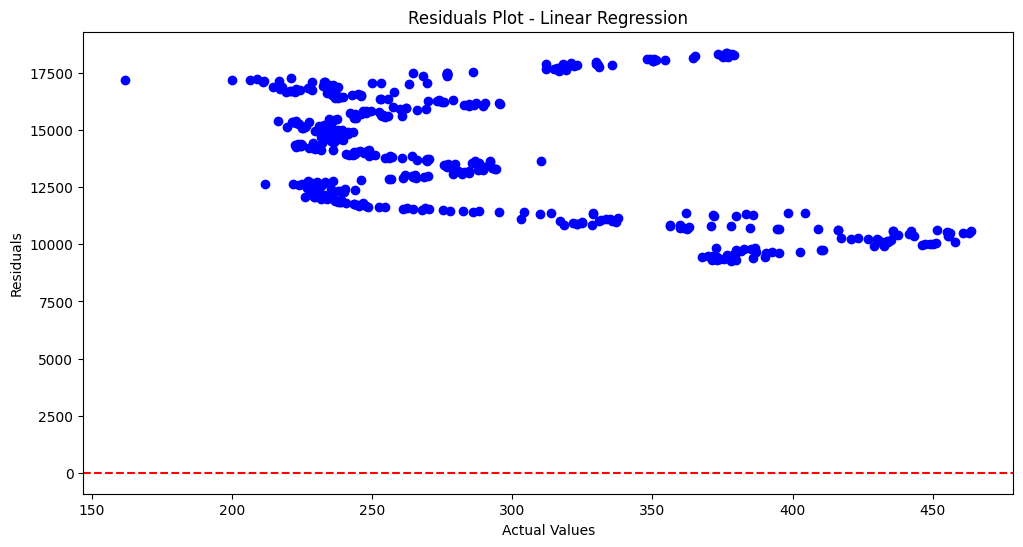

Random Forest Regressor - RMSE: 118.26061051244204, MAE: 106.00995941043077, MAPE: 0.42012983266099924


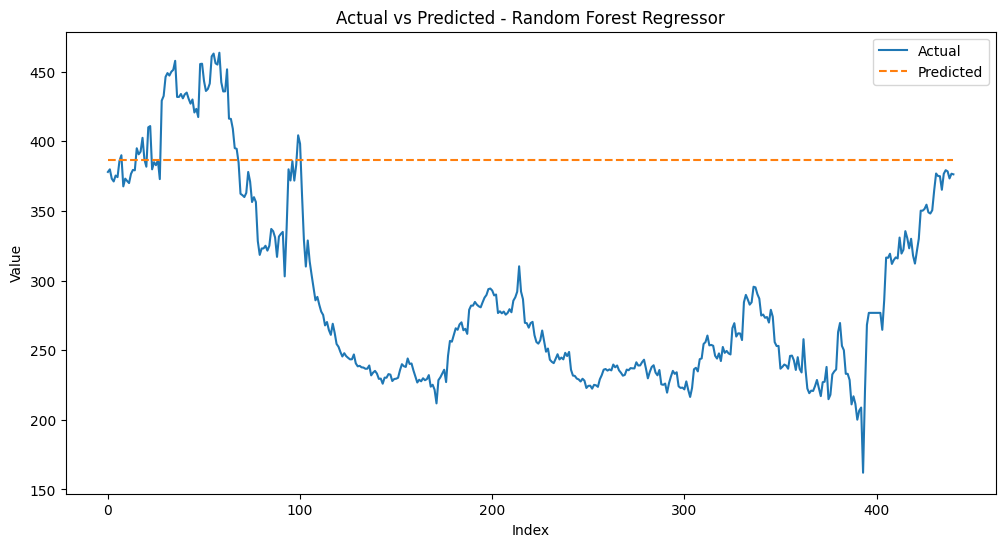

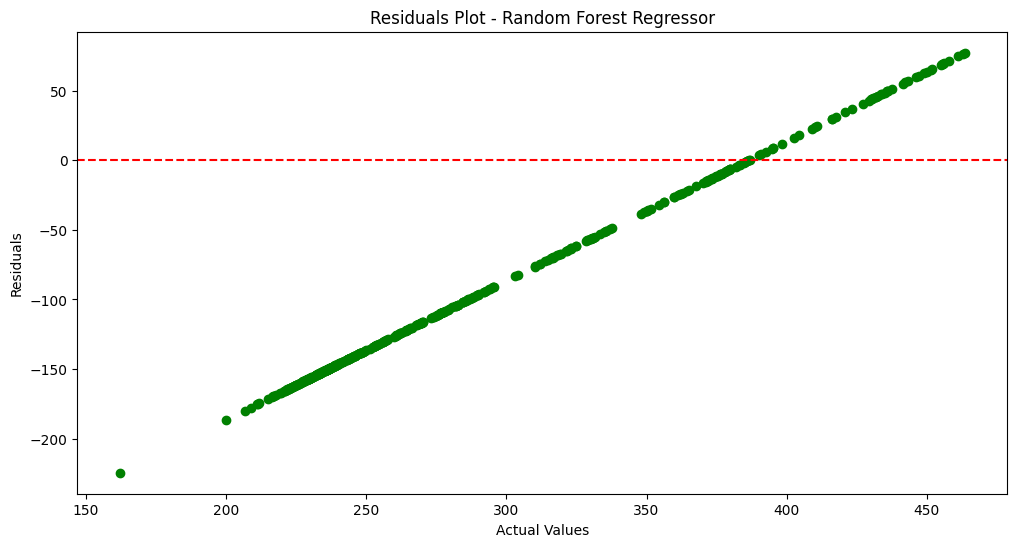

ARIMA - RMSE: 316.99561580557713, MAE: 309.48387255848985, MAPE: 1.0701061003914607


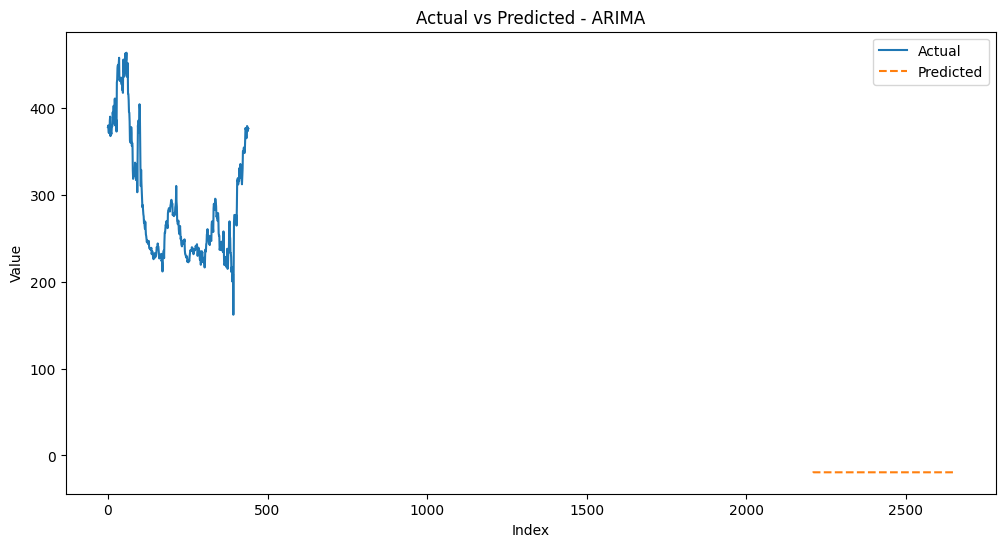

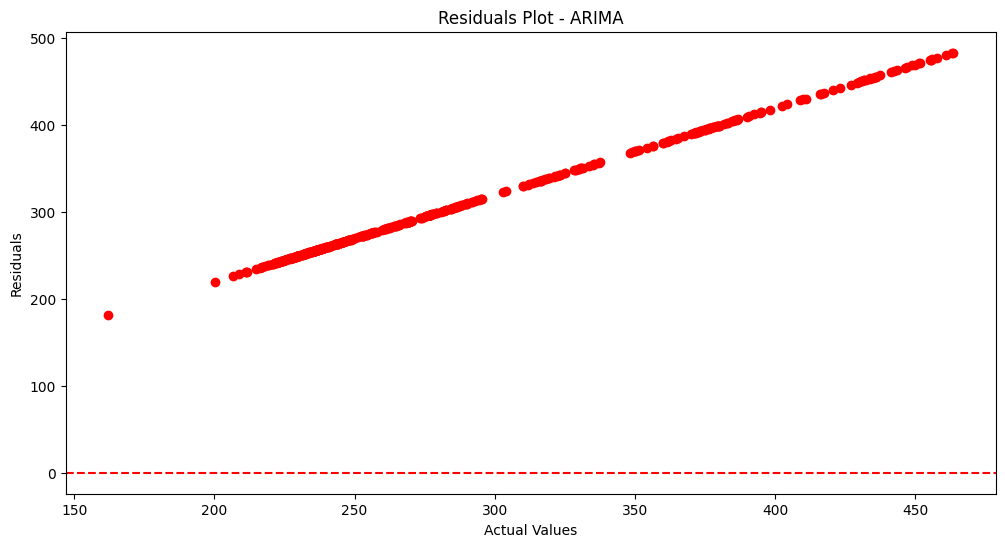

Linear Regression - Mean RMSE: 19891.54801800999
Linear Regression - Mean MAE: 19437.221563715946
Linear Regression - Mean MAPE: 16.669677756452977
Random Forest Regressor - Mean RMSE: 3355.065690796461
Random Forest Regressor - Mean MAE: 3017.0539714285705
Random Forest Regressor - Mean MAPE: 0.7421576953120544
ARIMA - Mean RMSE: 5312.344761391642
ARIMA - Mean MAE: 4921.058003663598
ARIMA - Mean MAPE: 1.0252289518912745


In [51]:
# Number of splits for TimeSeriesSplit
n_splits = 5  

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store evaluation metrics for each fold
rmse_list_lr = []
mae_list_lr = []
mape_list_lr = []
rmse_list_rf = []
mae_list_rf = []
mape_list_rf = []
rmse_list_arima = []
mae_list_arima = []
mape_list_arima = []

# Perform walk-forward validation for linear regression, random forest regressor, and ARIMA
for train_index, test_index in tscv.split(X):
    # Split data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Linear Regression
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
    rmse_list_lr.append(rmse_lr)
    mae_list_lr.append(mae_lr)
    mape_list_lr.append(mape_lr)

    # Print the evaluation metrics for linear regression
    print(f'Linear Regression - RMSE: {rmse_lr}, MAE: {mae_lr}, MAPE: {mape_lr}')

    # Plot actual vs predicted for Linear Regression
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred_lr, label='Predicted', linestyle='--')
    plt.title(f'Actual vs Predicted - Linear Regression')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Plot residuals for Linear Regression
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, y_test.values - y_pred_lr, 'bo')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals Plot - Linear Regression')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.show()

    # Random Forest Regressor
    model_rf = RandomForestRegressor()
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
    rmse_list_rf.append(rmse_rf)
    mae_list_rf.append(mae_rf)
    mape_list_rf.append(mape_rf)

    # Print the evaluation metrics for random forest regressor
    print(f'Random Forest Regressor - RMSE: {rmse_rf}, MAE: {mae_rf}, MAPE: {mape_rf}')

    # Plot actual vs predicted for Random Forest Regressor
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred_rf, label='Predicted', linestyle='--')
    plt.title('Actual vs Predicted - Random Forest Regressor')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Plot residuals for Random Forest Regressor
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, y_test.values - y_pred_rf, 'go')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals Plot - Random Forest Regressor')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.show()

    # ARIMA
    train_diff = y_train.diff().dropna()  # Make the data stationary
    model_arima = ARIMA(train_diff, order=(1, 0, 0))  
    model_arima_fit = model_arima.fit()
    y_pred_arima = model_arima_fit.forecast(steps=len(y_test))
    rmse_arima = np.sqrt(mean_squared_error(y_test, y_pred_arima))
    mae_arima = mean_absolute_error(y_test, y_pred_arima)
    mape_arima = mean_absolute_percentage_error(y_test, y_pred_arima)
    rmse_list_arima.append(rmse_arima)
    mae_list_arima.append(mae_arima)
    mape_list_arima.append(mape_arima)

    # Print the evaluation metrics for ARIMA
    print(f'ARIMA - RMSE: {rmse_arima}, MAE: {mae_arima}, MAPE: {mape_arima}')

    # Plot actual vs predicted for ARIMA
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred_arima, label='Predicted', linestyle='--')
    plt.title('Actual vs Predicted - ARIMA')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Plot residuals for ARIMA
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, y_test.values - y_pred_arima, 'ro')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals Plot - ARIMA')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.show()

# Calculate mean evaluation metrics for each model
mean_rmse_lr = np.mean(rmse_list_lr)
mean_mae_lr = np.mean(mae_list_lr)
mean_mape_lr = np.mean(mape_list_lr)
mean_rmse_rf = np.mean(rmse_list_rf)
mean_mae_rf = np.mean(mae_list_rf)
mean_mape_rf = np.mean(mape_list_rf)
mean_rmse_arima = np.mean(rmse_list_arima)
mean_mae_arima = np.mean(mae_list_arima)
mean_mape_arima = np.mean(mape_list_arima)

print("Linear Regression - Mean RMSE:", mean_rmse_lr)
print("Linear Regression - Mean MAE:", mean_mae_lr)
print("Linear Regression - Mean MAPE:", mean_mape_lr)
print("Random Forest Regressor - Mean RMSE:", mean_rmse_rf)
print("Random Forest Regressor - Mean MAE:", mean_mae_rf)
print("Random Forest Regressor - Mean MAPE:", mean_mape_rf)
print("ARIMA - Mean RMSE:", mean_rmse_arima)
print("ARIMA - Mean MAE:", mean_mae_arima)
print("ARIMA - Mean MAPE:", mean_mape_arima)

# Part 4: Comparative Analysis and Conclusion

# • Comparative Discussion:

## Linear Regression:

## Strengths:
####  - Despite having the highest RMSE and MAE among the three models, it demonstrates the simplest approach and computational efficiency.
####  - Residual analysis may provide insights into linear relationships between features and the target variable.
## Weaknesses:
#### - The model exhibits relatively high RMSE and MAE, suggesting limited predictive accuracy.
#### - The mean absolute percentage error (MAPE) of approximately 16.67% indicates a significant deviation of predicted values from actual values.

## Random Forest Regressor:

## Strengths:
#### - It outperforms linear regression significantly, with substantially lower RMSE and MAE, indicating better predictive accuracy.
#### - The MAPE of approximately 0.74% suggests a relatively low percentage of error in predictions compared to actual values.
#### - The model captures nonlinear relationships and interactions between features effectively.
## Weaknesses:
#### - While it performs better than linear regression, there might be room for further improvement, as evidenced by the residual analysis.

## ARIMA:

## Strengths:
#### - ARIMA demonstrates moderate predictive performance, with RMSE and MAE falling between linear regression and random forest regressor.
#### - It's particularly useful for time series data like daily Bitcoin prices due to its ability to capture temporal patterns and seasonality.
## Weaknesses:
#### - The RMSE and MAE values suggest slightly higher errors compared to the random forest regressor.
#### - Residual analysis may reveal areas where the model struggles to capture certain patterns or dynamics in the data.

# • Best Model Justification:

## Random Forest Regressor:

### - The Random Forest Regressor exhibited the lowest Mean RMSE of approximately 3355.07 and Mean MAE of around 3017.05.
### - Its Mean MAPE of approximately 0.74% signifies a relatively low percentage of error in predictions compared to actual values.
### - The model's capacity to capture nonlinear relationships and feature interactions contributed to its superior predictive accuracy.
### - Considering these performance metrics, the Random Forest Regressor emerges as the best model for forecasting Bitcoin daily prices.

# • Conclusion:

### Challenges in Forecasting Bitcoin Daily Prices:
- Bitcoin's volatile nature poses a challenge in accurately predicting its daily prices.
- Factors influencing Bitcoin's price, such as market sentiment, regulatory changes, and technological advancements, add complexity to the forecasting task.
- The absence of a centralized authority and the cryptocurrency's susceptibility to external factors make forecasting inherently challenging.

### Insights Gained from Using Different Models:
#### Linear Regression:
- Simple and computationally efficient but yielded relatively high errors, indicating limited predictive accuracy.
- Residual analysis may provide insights into linear relationships between features and the target variable.

#### Random Forest Regressor:
- Outperformed other models significantly, demonstrating lower RMSE, MAE, and MAPE.
- Effectively captured nonlinear relationships and interactions between features, contributing to its superior predictive accuracy.

#### ARIMA:
- Demonstrated moderate predictive performance, particularly suitable for time series data like daily Bitcoin prices.
- Captured temporal patterns and seasonality but exhibited slightly higher errors compared to the random forest regressor.

### Overall Findings:
- The Random Forest Regressor emerged as the best-performing model, offering the optimal balance of predictive accuracy and computational efficiency.
- Further fine-tuning and exploration of feature engineering may enhance the performance of all models in forecasting Bitcoin prices.
- Despite the challenges, employing various models provided valuable insights into the dynamic nature of Bitcoin's price movements and the effectiveness of different forecasting approaches.
